### Extraction of NN data temp notebook

##### Imports

In [1]:
from extraction.extract import *

import pandas as pd

In [ ]:
def show_heatmap(P: pd.DataFrame, dtkey: str = None):
    """Shows a heatmap of correlations for a pandas df

    Args:
        P (pd.DataFrame): pandas data
        dtkey (str, optional): dt column name for removal. Defaults to None.
    """

    if dtkey is not None:
        P = P.drop([dtkey], axis=1)

    plt.matshow(P.corr(), cmap="RdBu_r", vmin=-1, vmax=1)
    plt.xticks(range(P.shape[1]), P.columns, fontsize=12, rotation=-30)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(P.shape[1]), P.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)

In [ ]:
def show_raw_visualization(P: pd.DataFrame, date_time_key="timeslot"):
    """Show features of an NN dataframe over time

    Args:
        data (pd.dataFrame): pandas dataframe in NN format
        date_time_key (str, optional): column that provides datetime. Defaults to "timeslot".
    """
    ncols = 3
    time_data = P[date_time_key]
    feature_keys = P.columns
    fig, axes = plt.subplots(
        nrows=(len(feature_keys) + ncols - 1) // ncols,
        ncols=ncols,
        figsize=(20, 15),
        dpi=70,
        sharex=True,
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = plotcolors[i % (len(plotcolors))]
        t_data = P[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // ncols, i % ncols],
            color=c,
            title=key,
            rot=25,
        )
        # ax.legend(key)
        ax.grid()
    plt.tight_layout()


##### Extract data

In [2]:
### 1 airport
airport = "EHAM"
airports50 = ICAOTOP50 # imported from extraction

# catagorical flightlength returns length in bins instead of an average
X = generateNNdata(airport, timeslotLength=15, catagoricalFlightDuration=False)

### multiple airports, returns a dict of dataframes with ICAO codes as keys (uncomment)
# Xdict = generateNNdataMultiple(airports50, timeslotLength=15)

print(X.shape)
print(X.dtypes)


(55625, 21)
timeslot                    datetime64[ns]
departing                            int64
arriving                             int64
lowcost                            float64
arrivalsFlightDuration             float64
arrivalsDepartureDelay             float64
arrivalsArrivalDelay               float64
departuresFlightDuration           float64
departuresDepartureDelay           float64
departuresArrivalDelay             float64
planes                               int64
capacityFilled                     float64
weekend                              int64
winter                               int64
spring                               int64
summer                               int64
autumn                               int64
night                                int64
morning                              int64
afternoon                            int64
evening                              int64
dtype: object


In [5]:
X.to_parquet("eham_features.parquet")

##### Show correlations between features

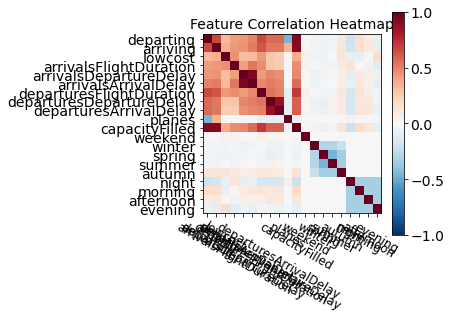

In [4]:
show_heatmap(X, dtkey="timeslot")

##### Show all features over time

In [ ]:
show_raw_visualization(X,date_time_key="timeslot")